# Big Mart Sales prediction

In this exercise we will analyse the data of the Big Mart Sales Competition [1].

## References

[1] https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


## Content


## Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Data
Train  data set: 8523

Test  data set: 5681

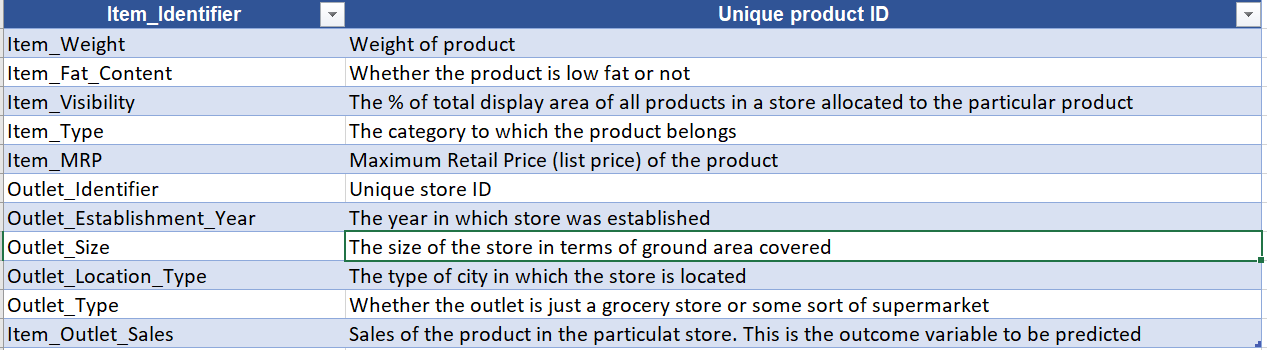

# Hypotheses generation

### Store Level Hypotheses

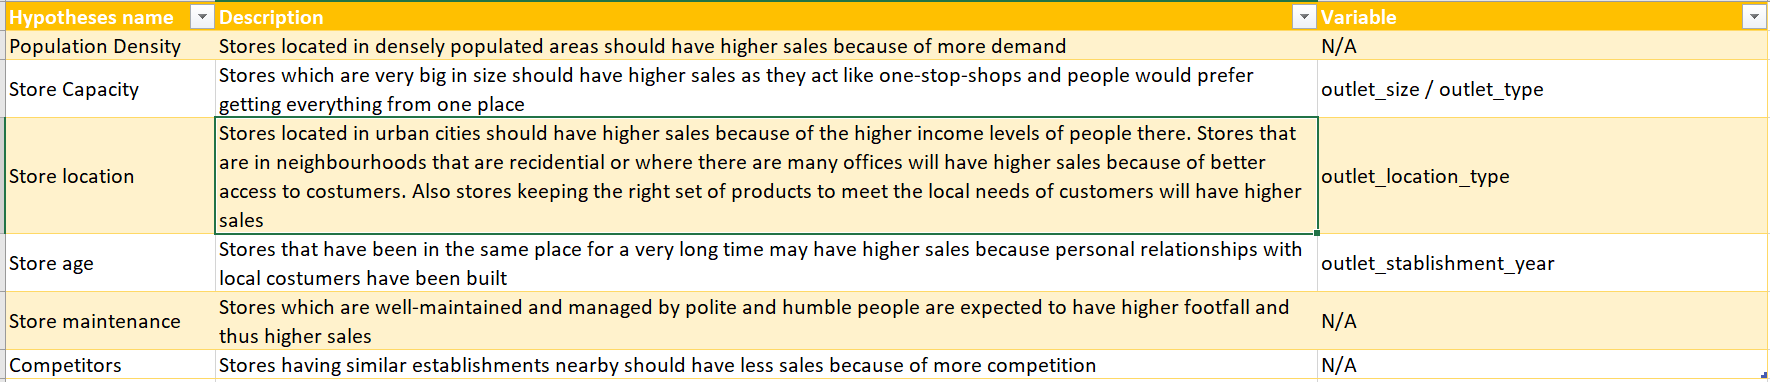

### Product Level Hypotheses

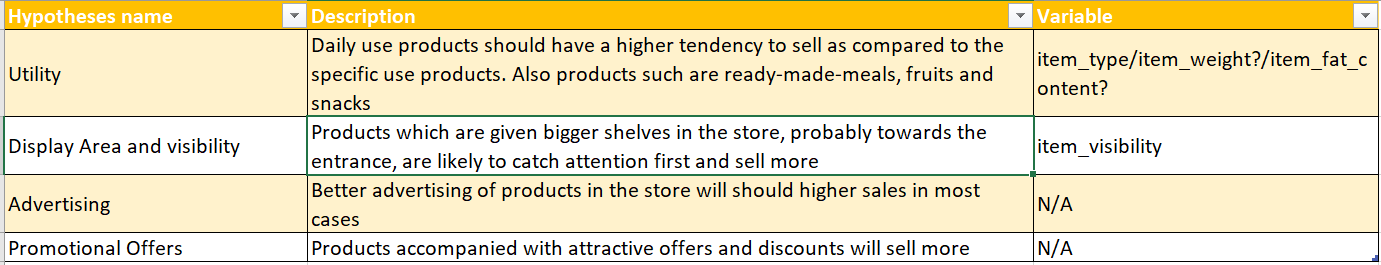

# Understand the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv(r'C:\Users\Personal Data\Project\Big Mart\Train.csv')
test = pd.read_csv(r'C:\Users\Personal Data\Project\Big Mart\Test.csv')

train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True)
len(data)

14204

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [6]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Observations:
1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
1. There are 10 stores.
1. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
1. There are only 16 Item_Type.

In [9]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

Observations:
1. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
2. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

#### Observations on Missing Values
1. The missing values of the Item_Outlet_Sales come from the test dataset.
1. The missing values of Item_Weight and Outlet_Size need to be imputed
1. The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
1. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.

#### Observations on Data Analysis to be done
1. There are 10 stores.
1. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
1. There are only 16 Item_Type.
1. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

#### Observations on Feature engineering to be done
1. It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.
1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
1. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

# Impute missing values

# Item_Weight

 Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

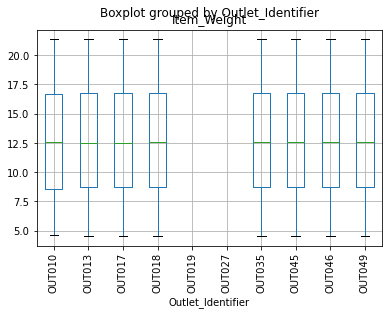

In [10]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [11]:
data_nn = data[~data['Item_Weight'].isnull()].reset_index()
data_n = data[data['Item_Weight'].isnull()].reset_index()
data_nn2 = data_nn.groupby(['Item_Identifier'])['Item_Weight'].mean().reset_index()
data_nn2.head(2)
for i in range (len(data_n)):
    #print(i)
    for j in range (len(data_nn2)):
      if ((data_n['Item_Identifier'][i]) == (data_nn2['Item_Identifier'][j])):
        #print(j)
        data_n['Item_Weight'][i] = data_nn2['Item_Weight'][j]
df_final=pd.concat([data_n,data_nn])


C:\Users\IN22916549\AppData\Local\Temp\ipykernel_22084\784277079.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['Item_Weight'][i] = data_nn2['Item_Weight'][j]


In [12]:
data = df_final

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

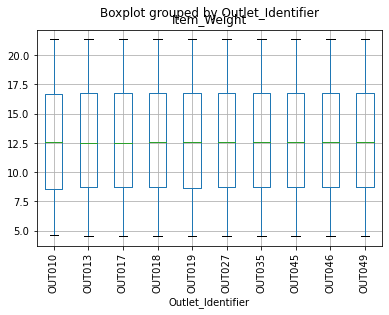

In [13]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [13]:
#add remove duplicate to data frame data_nn
#Wrong

In [14]:
data_i = data[["Outlet_Identifier", "Outlet_Size", "Outlet_Type"]].drop_duplicates().fillna("")

In [15]:
data_i

,Outlet_Identifier,Outlet_Size,Outlet_Type
0,OUT027,Medium,Supermarket Type3
3,OUT019,Small,Grocery Store
0,OUT049,Medium,Supermarket Type1
1,OUT018,Medium,Supermarket Type2
3,OUT010,,Grocery Store
4,OUT013,High,Supermarket Type1
7,OUT045,,Supermarket Type1
8,OUT017,,Supermarket Type1
10,OUT046,Small,Supermarket Type1
17,OUT035,Small,Supermarket Type1


In [16]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [17]:
data_merge = pd.merge(data_i,data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum(), on = "Outlet_Identifier" )

In [18]:
data_merge ["Sales Participation"] = data_merge ["Item_Outlet_Sales"] /sum(data_merge ["Item_Outlet_Sales"])*100

In [19]:
data_merge

,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Sales Participation
0,OUT027,Medium,Supermarket Type3,3.453926e+06,18.578359
1,OUT019,Small,Grocery Store,1.796941e+05,0.966558
2,OUT049,Medium,Supermarket Type1,2.183970e+06,11.747378
3,OUT018,Medium,Supermarket Type2,1.851823e+06,9.960789
4,OUT010,,Grocery Store,1.883402e+05,1.013065
5,OUT013,High,Supermarket Type1,2.142664e+06,11.525196
6,OUT045,,Supermarket Type1,2.036725e+06,10.955364
7,OUT017,,Supermarket Type1,2.167465e+06,11.658602
8,OUT046,Small,Supermarket Type1,2.118395e+06,11.394658
9,OUT035,Small,Supermarket Type1,2.268123e+06,12.200030


In [20]:
data.loc[data["Outlet_Identifier"] == "OUT010", "Outlet_Size"] = "Small"

In [22]:
data.loc[data["Outlet_Identifier"] == "OUT013", "Outlet_Size"] = "Medium"
data.loc[data["Outlet_Identifier"] == "OUT045", "Outlet_Size"] = "Medium"
data.loc[data["Outlet_Identifier"] == "OUT017", "Outlet_Size"] = "Medium"
data.loc[data["Outlet_Identifier"] == "OUT046", "Outlet_Size"] = "Medium"
data.loc[data["Outlet_Identifier"] == "OUT035", "Outlet_Size"] = "Medium"

In [23]:
data_i = data[["Outlet_Identifier", "Outlet_Size", "Outlet_Type"]].drop_duplicates().fillna("")
data_i

,Outlet_Identifier,Outlet_Size,Outlet_Type
0,OUT027,Medium,Supermarket Type3
3,OUT019,Small,Grocery Store
0,OUT049,Medium,Supermarket Type1
1,OUT018,Medium,Supermarket Type2
3,OUT010,Small,Grocery Store
4,OUT013,Medium,Supermarket Type1
7,OUT045,Medium,Supermarket Type1
8,OUT017,Medium,Supermarket Type1
10,OUT046,Medium,Supermarket Type1
17,OUT035,Medium,Supermarket Type1


In [24]:
data.apply(lambda x: sum(x.isnull()))

index                           0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [25]:
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.077290      3
0.077011      3
0.076792      3
Name: Item_Visibility, dtype: int64

In [26]:
# visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

In [27]:
data['Item_Visibility'].value_counts().head()

0.076856    3
0.076483    3
0.077290    3
0.076792    3
0.077011    3
Name: Item_Visibility, dtype: int64

[Text(0, 0, 'Snack Foods'),
 Text(1, 0, 'Hard Drinks'),
 Text(2, 0, 'Baking Goods'),
 Text(3, 0, 'Canned'),
 Text(4, 0, 'Fruits and Vegetables'),
 Text(5, 0, 'Dairy'),
 Text(6, 0, 'Frozen Foods'),
 Text(7, 0, 'Household'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Soft Drinks'),
 Text(10, 0, 'Meat'),
 Text(11, 0, 'Health and Hygiene'),
 Text(12, 0, 'Starchy Foods'),
 Text(13, 0, 'Others'),
 Text(14, 0, 'Seafood'),
 Text(15, 0, 'Breads')]

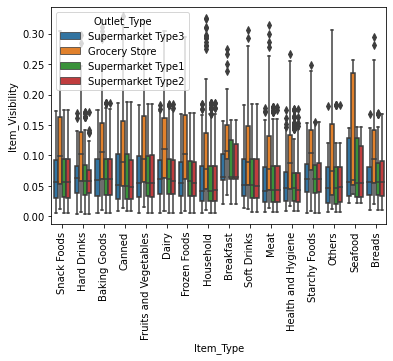

In [28]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
#del data['level_0']

In [29]:
data_nn = data[~data['Item_Visibility'].isna()].reset_index()
data_n =data[data['Item_Visibility'].isna()].reset_index()
data_nn2 = data_nn.groupby(['Outlet_Identifier', 'Item_Identifier'])['Item_Visibility'].mean().reset_index()
data_nn2.head(2)
for i in range (len(data_n)):
    #print(i)
    for j in range (len(data_nn2)):
      if ((data_n['Item_Identifier'][i]) == (data_nn2['Item_Identifier'][j]) and (data_n['Outlet_Identifier'][i]) == (data_nn2['Outlet_Identifier'][j])):
        #print(j)
        data_n['Item_Visibility'][i] = data_nn2['Item_Visibility'][j]
df_final=pd.concat([data_n,data_nn])


In [30]:
len(df_final[df_final['Item_Visibility'].isna()])

879

In [31]:
data_nn = data[~data['Item_Visibility'].isna()].reset_index()
data_n =data[data['Item_Visibility'].isna()].reset_index()
data_nn2 = data_nn.groupby(['Outlet_Type', 'Item_Identifier'])['Item_Visibility'].mean().reset_index()
data_nn2.head(2)
for i in range (len(data_n)):
    #print(i)
    for j in range (len(data_nn2)):
      if ((data_n['Item_Identifier'][i]) == (data_nn2['Item_Identifier'][j]) and (data_n['Outlet_Type'][i]) == (data_nn2['Outlet_Type'][j])):
        #print(j)
        data_n['Item_Visibility'][i] = data_nn2['Item_Visibility'][j]
df_final=pd.concat([data_n,data_nn])


C:\Users\IN22916549\AppData\Local\Temp\ipykernel_22084\2283952861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['Item_Visibility'][i] = data_nn2['Item_Visibility'][j]


In [32]:
len(df_final[df_final['Item_Visibility'].isna()])

239

In [33]:
len(data[data['Item_Visibility'].isna()])

879

In [34]:
data = df_final

In [35]:
del data['level_0']

In [36]:
data_nn = data[~data['Item_Visibility'].isna()].reset_index()
data_n =data[data['Item_Visibility'].isna()].reset_index()
data_nn2 = data_nn.groupby(['Item_Type', 'Item_Identifier'])['Item_Visibility'].mean().reset_index()
data_nn2.head(2)
for i in range (len(data_n)):
    #print(i)
    for j in range (len(data_nn2)):
      if ((data_n['Item_Identifier'][i]) == (data_nn2['Item_Identifier'][j]) and (data_n['Item_Type'][i]) == (data_nn2['Item_Type'][j])):
        #print(j)
        data_n['Item_Visibility'][i] = data_nn2['Item_Visibility'][j]
df_final=pd.concat([data_n,data_nn])

C:\Users\IN22916549\AppData\Local\Temp\ipykernel_22084\1602394028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['Item_Visibility'][i] = data_nn2['Item_Visibility'][j]


In [37]:
len(df_final[df_final['Item_Visibility'].isna()])

0

In [38]:
data = df_final

In [39]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Regular
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [40]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Feature Engineering

### Convert the Outlet_Establishment_Years into how old the establishments are

In [41]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    28
1    28
2    28
3    28
4    28
Name: Outlet_Age, dtype: int64

In [42]:
data['Outlet_Age'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Age, dtype: float64

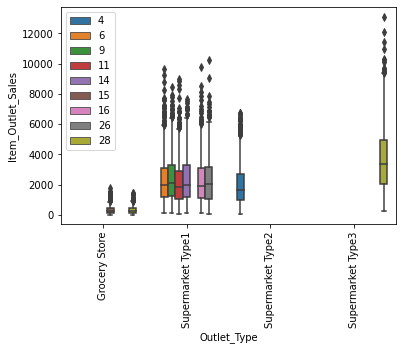

In [43]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

Supermarket type 3 is the oldest, having been stablished 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relaviely old.

Create broader category for type of item
Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean.

In [44]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [45]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [46]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [47]:
data['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Category, dtype: int64

# Make a new category for items that reflect their sales - very high, high, medium, low

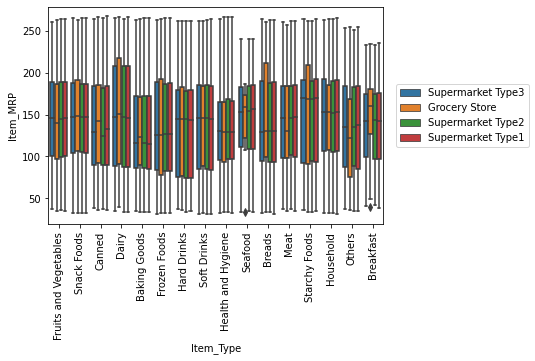

In [48]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

Now we can have a look at the distribution of all Item_MRP.

C:\Users\IN22916549\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


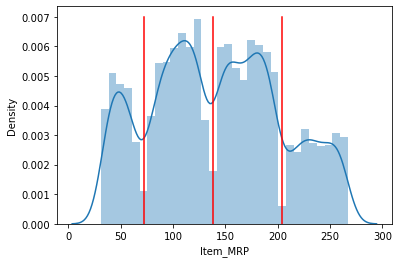

In [49]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

In [50]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_MRP_Category, dtype: int64

In [ ]:
data.to_excel(r'C:\Users\Personal Data\Project\Big Mart\analysis.xlsx', index = False)


# Analysis
Numerical data

---------  Why Grocery Has Less Sale -------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


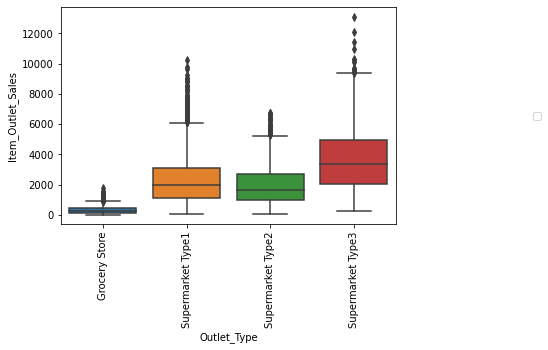

In [51]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

In [52]:
data_i

,Outlet_Identifier,Outlet_Size,Outlet_Type
0,OUT027,Medium,Supermarket Type3
3,OUT019,Small,Grocery Store
0,OUT049,Medium,Supermarket Type1
1,OUT018,Medium,Supermarket Type2
3,OUT010,Small,Grocery Store
4,OUT013,Medium,Supermarket Type1
7,OUT045,Medium,Supermarket Type1
8,OUT017,Medium,Supermarket Type1
10,OUT046,Medium,Supermarket Type1
17,OUT035,Medium,Supermarket Type1


In [53]:
data_ii = data_i[["Outlet_Type"]].drop_duplicates().fillna("")

In [ ]:
#data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

In [54]:
data_merge_i = pd.merge(data_ii,data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()/1000000, on = "Outlet_Type" )

In [55]:
data_merge_i

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3.453926
1,Grocery Store,0.368034
2,Supermarket Type1,12.917342
3,Supermarket Type2,1.851823


In [56]:
data_merge_i = pd.merge(data_merge_i, data_i.groupby('Outlet_Type')['Outlet_Identifier'].count(),  on = "Outlet_Type")

In [57]:
data_merge_i["Avg_Sales"] = data_merge_i["Item_Outlet_Sales"] / data_merge_i["Outlet_Identifier"]

In [58]:
data_merge_i

,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier,Avg_Sales
0,Supermarket Type3,3.453926,1,3.453926
1,Grocery Store,0.368034,2,0.184017
2,Supermarket Type1,12.917342,6,2.152890
3,Supermarket Type2,1.851823,1,1.851823


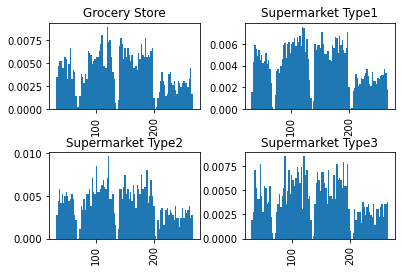

In [59]:
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

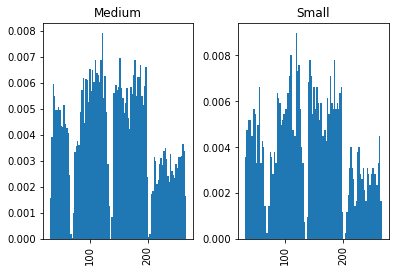

In [59]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

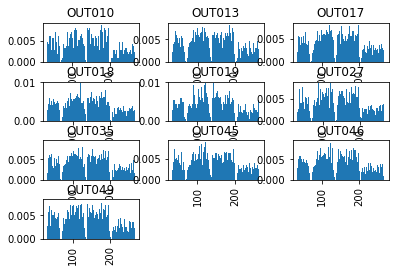

In [60]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

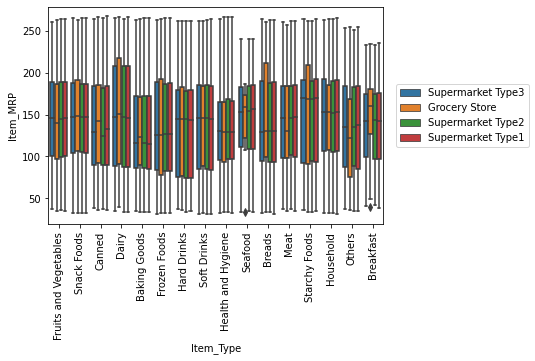

In [61]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

We don't have enough evidence to proof why grocery store sales is very low.
But here is possible reason
1. Grocery Stores are small in size, may be that is one of the reason of footfalls
2. May be there's some trade events / Promo is running particularly in medium / large size stores
3. Halo Effect - As Supermarkets are big in size, people comes to buy one product but ends up buing more product
4. Grocery Stores are located into least populated city / Place
5. Their might be competition for Grocery Stores

------------- end of anaysis -------------------

In [62]:
data.describe()

,level_0,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,6276.896015,7101.500000,12.793380,0.070377,141.004977,1997.830681,2181.288914,15.169319
std,4016.710768,4100.485947,4.651716,0.050159,62.086938,8.371664,1706.499616,8.371664
min,0.000000,0.000000,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,2671.750000,3550.750000,8.710000,0.031330,94.012000,1987.000000,834.247400,9.000000
50%,6222.500000,7101.500000,12.600000,0.057867,142.247000,1999.000000,1794.331000,14.000000
75%,9773.250000,10652.250000,16.750000,0.097769,185.855600,2004.000000,3101.296400,26.000000
max,13324.000000,14203.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [60]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())



Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    12399
Small   

In [61]:
data.head()

,level_0,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Type_Category,Item_MRP_Category
0,0,370,FDZ07,15.100,Regular,0.110708,Fruits and Vegetables,60.2194,OUT027,1985,Medium,Tier 3,Supermarket Type3,1733.7432,train,28,Food,Low
1,1,388,FDP22,14.650,Regular,0.099306,Snack Foods,52.6666,OUT027,1985,Medium,Tier 3,Supermarket Type3,717.7324,train,28,Food,Low
2,2,472,FDU56,16.850,Low Fat,0.044504,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704,train,28,Food,High
3,5,844,FDV01,19.200,Regular,0.098465,Canned,154.6314,OUT027,1985,Medium,Tier 3,Supermarket Type3,6515.5188,train,28,Food,High
4,7,1113,FDB21,7.475,Low Fat,0.162689,Fruits and Vegetables,242.9854,OUT027,1985,Medium,Tier 3,Supermarket Type3,6767.1912,train,28,Food,Very High


drop the Outlet_Establishment_Year column from the data

In [62]:

data = data.drop(['level_0','index'], axis=1)
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Outlet_Age                     int64
Item_Type_Category            object
Item_MRP_Category             object
dtype: object

In [63]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Type_Category,Item_MRP_Category
0,FDZ07,15.100,Regular,0.110708,Fruits and Vegetables,60.2194,OUT027,1985,Medium,Tier 3,Supermarket Type3,1733.7432,train,28,Food,Low
1,FDP22,14.650,Regular,0.099306,Snack Foods,52.6666,OUT027,1985,Medium,Tier 3,Supermarket Type3,717.7324,train,28,Food,Low
2,FDU56,16.850,Low Fat,0.044504,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704,train,28,Food,High
3,FDV01,19.200,Regular,0.098465,Canned,154.6314,OUT027,1985,Medium,Tier 3,Supermarket Type3,6515.5188,train,28,Food,High
4,FDB21,7.475,Low Fat,0.162689,Fruits and Vegetables,242.9854,OUT027,1985,Medium,Tier 3,Supermarket Type3,6767.1912,train,28,Food,Very High


# Numerical and One-Hot Coding of Categorical Variables

drop the Outlet_Establishment_Year and Item_Number_Sales columns from the data

In [64]:

data = data.drop(['Outlet_Establishment_Year'], axis=1)
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [65]:
from copy import deepcopy
data_copy = deepcopy(data)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
data_copy['Outlet'] = le.fit_transform(data_copy['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data_copy[i] = le.fit_transform(data_copy[i])

In [67]:
data_copy2 = deepcopy(data_copy)

In [68]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data_copy2 = pd.get_dummies(data_copy2, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [69]:
data_copy2.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
source                     object
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Type_0                 uint8
Item_Type_1                 uint8
Item_Type_2                 uint8
Item_Type_3                 uint8
Item_Type_4                 uint8
Item_Type_5                 uint8
Item_Type_6                 uint8
Item_Type_7                 uint8
Item_Type_8                 uint8
Item_Type_9                 uint8
Item_Type_10                uint8
Item_Type_11                uint8
Item_Type_12                uint8
Item_Type_13                uint8
Item_Type_14                uint8
Item_Type_15                uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0 

In [70]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [ ]:
#Standardisation of numerical data

In [71]:
data_copy3 = deepcopy(data_copy2)

In [72]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDZ07,15.100,0.110708,60.2194,OUT027,1733.7432,train,28,0,1,...,0,0,0,0,0,1,0,0,0,0
1,FDP22,14.650,0.099306,52.6666,OUT027,717.7324,train,28,0,1,...,0,0,0,0,0,1,0,0,0,0
2,FDU56,16.850,0.044504,184.7266,OUT027,8114.7704,train,28,1,0,...,0,0,0,0,0,1,0,0,0,0
3,FDV01,19.200,0.098465,154.6314,OUT027,6515.5188,train,28,0,1,...,0,0,0,0,0,1,0,0,0,0
4,FDB21,7.475,0.162689,242.9854,OUT027,6767.1912,train,28,1,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.070377,141.004977,2181.288914,15.169319,0.646649,0.353351,0.076457,0.029288,0.013095,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,4.651716,0.050159,62.086938,1706.499616,8.371664,0.478027,0.478027,0.265738,0.168617,0.113685,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,4.555000,0.003575,31.290000,33.290000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.710000,0.031330,94.012000,834.247400,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.057867,142.247000,1794.331000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.750000,0.097769,185.855600,3101.296400,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
from sklearn import preprocessing

# standardisation of numerical data
X = data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']] = standardized_X


In [75]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDZ07,0.495882,0.804093,60.2194,OUT027,1733.7432,train,1.532686,0,1,...,0,0,0,0,0,1,0,0,0,0
1,FDP22,0.399140,0.576770,52.6666,OUT027,717.7324,train,1.532686,0,1,...,0,0,0,0,0,1,0,0,0,0
2,FDU56,0.872100,-0.515832,184.7266,OUT027,8114.7704,train,1.532686,1,0,...,0,0,0,0,0,1,0,0,0,0
3,FDV01,1.377308,0.560006,154.6314,OUT027,6515.5188,train,1.532686,0,1,...,0,0,0,0,0,1,0,0,0,0
4,FDB21,-1.143356,1.840437,242.9854,OUT027,6767.1912,train,1.532686,1,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,1.420400e+04,1.420400e+04,14204.000000,8523.000000,1.420400e+04,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,3.765879e-17,-1.586078e-16,141.004977,2181.288914,2.250547e-15,0.646649,0.353351,0.076457,0.029288,0.013095,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,1.000035e+00,1.000035e+00,62.086938,1706.499616,1.000035e+00,0.478027,0.478027,0.265738,0.168617,0.113685,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,-1.771104e+00,-1.331844e+00,31.290000,33.290000,-1.334228e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.778533e-01,-7.784796e-01,94.012000,834.247400,-7.369545e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.157330e-02,-2.494198e-01,142.247000,1794.331000,-1.396807e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.506020e-01,5.461227e-01,185.855600,3101.296400,1.293777e+00,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.839519e+00,5.144065e+00,266.888400,13086.964800,1.532686e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separate train and test datasets and export data

The variables named 'train' and 'test' are the data with numerical and one-hot coding of categorical variables. The variables 'train_num_cat' and 'test_num_cat' are the data with only numerical coding of categorical varuables. The variables 'otrain' and 'otest' (o is for original) are the data without coding.

In [77]:
# divide into train and test
train = data_copy3.loc[data_copy3['source']=='train']
test = data_copy3.loc[data_copy3['source']=='test']

# drop unnecessary columns
train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)


C:\Users\IN22916549\AppData\Local\Temp\ipykernel_22084\809155593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'], axis=1, inplace=True)
C:\Users\IN22916549\AppData\Local\Temp\ipykernel_22084\809155593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)


In [78]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDZ07,0.495882,0.804093,60.2194,OUT027,1733.7432,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,FDP22,0.399140,0.576770,52.6666,OUT027,717.7324,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,FDU56,0.872100,-0.515832,184.7266,OUT027,8114.7704,1.532686,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,FDV01,1.377308,0.560006,154.6314,OUT027,6515.5188,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,FDB21,-1.143356,1.840437,242.9854,OUT027,6767.1912,1.532686,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,FDF22,-1.274495,-0.271014,214.5218,OUT013,2778.3834,1.293777,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9553,FDS36,-0.948797,-0.466418,108.1570,OUT045,549.2850,-0.498045,0,1,1,...,0,0,0,0,0,0,0,1,0,0
9554,NCJ29,-0.471537,-0.701599,85.1224,OUT035,1193.1136,-0.736955,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9555,FDN46,-1.200326,1.492172,103.1332,OUT018,1845.5976,-1.334228,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
train.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDZ07,0.495882,0.804093,60.2194,OUT027,1733.7432,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,FDP22,0.399140,0.576770,52.6666,OUT027,717.7324,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,FDU56,0.872100,-0.515832,184.7266,OUT027,8114.7704,1.532686,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,FDV01,1.377308,0.560006,154.6314,OUT027,6515.5188,1.532686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,FDB21,-1.143356,1.840437,242.9854,OUT027,6767.1912,1.532686,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,-1.274495,-0.271014,214.5218,OUT013,2778.3834,1.293777,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,-0.948797,-0.466418,108.1570,OUT045,549.2850,-0.498045,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,-0.471537,-0.701599,85.1224,OUT035,1193.1136,-0.736955,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,-1.200326,1.492172,103.1332,OUT018,1845.5976,-1.334228,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
74,FDZ36,-1.452930,0.117831,186.4240,OUT027,1.532686,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
75,DRH03,0.958093,-0.592414,94.8120,OUT027,1.532686,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76,NCU53,-1.571170,-0.477666,165.7842,OUT027,1.532686,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
77,FDQ21,1.818021,-0.978928,123.1756,OUT027,1.532686,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
78,FDQ27,-1.634590,-0.436678,104.7990,OUT027,1.532686,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,FDW46,0.044419,0.000680,63.4484,OUT049,-0.139681,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13961,FDB58,-0.493036,-1.134032,141.3154,OUT046,0.099229,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
13962,FDD47,-1.116483,1.447717,169.1448,OUT018,-1.334228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13963,NCO17,-0.600527,0.062837,118.7440,OUT045,-0.498045,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Model Building

#Now we divide the training data into training and test sets
... and we perform cross validation on the training data.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'Item_Outlet_Sales'], train['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train = X_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test = X_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6818, 48) (6818,)
(1705, 48) (1705,)


In [82]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
663,-0.170563,-0.729040,180.5976,1.532686,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8791,0.044419,-0.002665,65.7484,1.293777,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
878,-1.292769,0.299368,226.7694,1.532686,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7901,0.366893,-0.581409,42.0454,1.293777,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3750,0.657118,-0.025706,218.7166,-0.736955,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
y_train.head()

663     7968.2944
8791     391.4904
878     6165.9738
7901     629.1810
3750    1088.5830
Name: Item_Outlet_Sales, dtype: float64

Choose the most relevant features
Let's have a look at the relative importance of the predictors in building models. We do that with Recursive Feature Elimination (rfe) from the sklearn package with different models. One-hot encoding of the factor variables leaves us with 56 predictors, of which only the first 13 or so should suffice to build a predictive model while avoiding over-fitting.

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)



Feature Ranking:
 Outlet_9                  45
Outlet_8                  44
Outlet_Location_Type_0    43
Outlet_7                  42
Item_Type_15              41
Outlet_6                  40
Item_Type_14              39
Item_Type_10              38
Item_Type_11              37
Outlet_Location_Type_2    36
Outlet_5                  35
Outlet_4                  34
Item_Type_13              33
Outlet_3                  32
Item_Type_12              31
Outlet_2                  30
Item_Type_9               29
Outlet_1                  28
Item_Type_8               27
Outlet_0                  26
Item_Type_7               25
Item_MRP_Category_3       24
Item_Type_6               23
Item_MRP_Category_2       22
Item_Type_5               21
Item_MRP_Category_1       20
Item_Type_4               19
Item_MRP_Category_0       18
Item_Type_3               17
Item_Type_Category_2      16
Item_Type_2               15
Item_Type_Category_1      14
Item_Fat_Content_0        13
Item_Type_0              

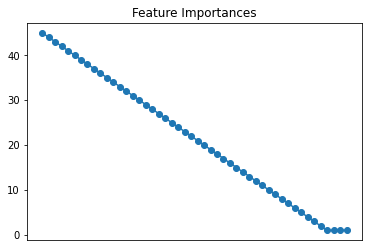

In [85]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)

Feature selection with Recursive Feature Elimination and a RandomForestRegressor

From the analysis done, it makes sense that the features chosen include (in no particualr order):

Item_Visibility            

Outlet_Age                 

Item_MRP_Category_3        

Outlet_Type_3              

Outlet_Type_0              

Item_MRP    

Both of these methods choose the same most important features. Hot-coding of the categorical variables leaves a total of 55 features (numerical and categorical). So we will work with the top 15.

In [86]:
features = list(coefs.index[:16])
not_features = list(coefs.index[16:])

In [87]:
display(features)

['Outlet_9',
 'Outlet_8',
 'Outlet_Location_Type_0',
 'Outlet_7',
 'Item_Type_15',
 'Outlet_6',
 'Item_Type_14',
 'Item_Type_10',
 'Item_Type_11',
 'Outlet_Location_Type_2',
 'Outlet_5',
 'Outlet_4',
 'Item_Type_13',
 'Outlet_3',
 'Item_Type_12',
 'Outlet_2']

In [88]:
IV_cols = features
DV_cols = ['Item_Outlet_Sales']

In [89]:
dev_sample = train.loc[:,['Item_Outlet_Sales']+features]
oot_sample = test.loc[:,features]

In [90]:
display(pd.DataFrame(dev_sample.describe()).transpose())

,count,mean,std,min,25%,50%,75%,max
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.2474,1794.331,3101.2964,13086.9648
Outlet_9,8523.0,0.109117,0.311804,0.00,0.0000,0.000,0.0000,1.0000
Outlet_8,8523.0,0.109117,0.311804,0.00,0.0000,0.000,0.0000,1.0000
Outlet_Location_Type_0,8523.0,0.280183,0.449115,0.00,0.0000,0.000,1.0000,1.0000
Outlet_7,8523.0,0.108999,0.311656,0.00,0.0000,0.000,0.0000,1.0000
Item_Type_15,8523.0,0.017365,0.130634,0.00,0.0000,0.000,0.0000,1.0000
Outlet_6,8523.0,0.109117,0.311804,0.00,0.0000,0.000,0.0000,1.0000
Item_Type_14,8523.0,0.052212,0.222467,0.00,0.0000,0.000,0.0000,1.0000
Item_Type_10,8523.0,0.049865,0.217679,0.00,0.0000,0.000,0.0000,1.0000
Item_Type_11,8523.0,0.019829,0.139420,0.00,0.0000,0.000,0.0000,1.0000


In [91]:
display(pd.DataFrame(dev_sample[IV_cols].describe()).transpose())

,count,mean,std,min,25%,50%,75%,max
Outlet_9,8523.0,0.109117,0.311804,0.0,0.0,0.0,0.0,1.0
Outlet_8,8523.0,0.109117,0.311804,0.0,0.0,0.0,0.0,1.0
Outlet_Location_Type_0,8523.0,0.280183,0.449115,0.0,0.0,0.0,1.0,1.0
Outlet_7,8523.0,0.108999,0.311656,0.0,0.0,0.0,0.0,1.0
Item_Type_15,8523.0,0.017365,0.130634,0.0,0.0,0.0,0.0,1.0
Outlet_6,8523.0,0.109117,0.311804,0.0,0.0,0.0,0.0,1.0
Item_Type_14,8523.0,0.052212,0.222467,0.0,0.0,0.0,0.0,1.0
Item_Type_10,8523.0,0.049865,0.217679,0.0,0.0,0.0,0.0,1.0
Item_Type_11,8523.0,0.019829,0.139420,0.0,0.0,0.0,0.0,1.0
Outlet_Location_Type_2,8523.0,0.393054,0.488457,0.0,0.0,0.0,1.0,1.0


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression,LinearRegression,LinearRegression
#from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
#from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score
#from sklearn.metrics import mean_squared_log_error
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
#from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_error,mean_squared_log_error
#import lightgbm as lgb

C:\Users\IN22916549\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [94]:
xgb1 = XGBRegressor(random_state=9999)
parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.03, 0.05, 0.0], 
              'max_depth': [1,2,4],
              'min_child_weight': [2,4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=False,
                        scoring="neg_mean_absolute_error")

xgb_grid.fit(dev_sample[IV_cols],dev_sample[DV_cols].values.ravel())
xgb_grid

pd.DataFrame([xgb_grid.best_params_]).T

C:\Users\IN22916549\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,0
colsample_bytree,0.7
learning_rate,0.03
max_depth,1
min_child_weight,2
n_estimators,500
nthread,4
objective,reg:squarederror
subsample,0.7


In [95]:
model = XGBRegressor(
    learning_rate = 0.03,
    max_dept=1,
    n_estimators=500,
    min_child_weight=2, 
    colsample_bytree=0.7, 
    subsample=0.7, 
    eta=0.1,
    seed=42)

In [105]:
#xgb_grid.fit(dev_sample[IV_cols],dev_sample[DV_cols].values.ravel())

C:\Users\IN22916549\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=5,
        

In [99]:
#del X_test['index']

In [97]:

X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8537,-1.619541,-0.913717,95.7068,-0.139681,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3991,0.334645,-1.063409,112.5228,0.099229,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8065,-0.106068,0.721048,173.2396,-0.498045,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1198,-1.110034,1.269609,45.3402,1.532686,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
970,-1.312117,-0.670789,177.2370,1.532686,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse")

C:\Users\IN22916549\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:15:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_dept=1, max_depth=6, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.7, tree_method='exact', validate_parameters=1, ...)

In [99]:
y_pred = model.predict(X_test)
y_pred

array([2060.1975, 1915.2996, 2651.101 , ..., 2991.477 , 2242.135 ,
       2775.0046], dtype=float32)

In [101]:
y_pred


#del X_pred['index']
#del X_pred['level_0']
#del y_test['level_0']
#del y_test['index']

array([2060.1975, 1915.2996, 2651.101 , ..., 2991.477 , 2242.135 ,
       2775.0046], dtype=float32)

In [103]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [104]:
RMSE

1141.4913127140792